In [1]:
import pandas as pd

In [2]:
movie = pd.read_csv("./IMDB/IMDB-Movie-Data.csv")

In [3]:
# 1）判断是否存在NaN类型的缺失值
print(movie.head())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [4]:
import numpy as np

In [5]:
print(np.any(pd.isnull(movie))) # 返回True，说明数据中存在缺失值

True


In [6]:
print(np.all(pd.notnull(movie))) # 返回False，说明数据中存在缺失值

False


In [7]:
print(pd.isnull(movie).any())

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool


In [8]:
print(pd.notnull(movie).all())

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool


In [9]:
# 2）缺失值处理
# 方法1：删除含有缺失值的样本
data1 = movie.dropna()

In [10]:
print(pd.notnull(movie).all())

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool


In [11]:
print(pd.notnull(data1).all())

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool


In [12]:
# 方法2：替换

In [13]:
# 含有缺失值的字段
# Revenue (Millions)    
# Metascore
movie["Revenue (Millions)"].fillna(movie["Revenue (Millions)"].mean(), inplace=True)
movie["Metascore"].fillna(movie["Metascore"].mean(), inplace=True)

In [14]:
print(pd.notnull(movie).all()) # 缺失值已经处理完毕，不存在缺失值

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool


### 不是缺失值nan，有默认标记的

In [16]:
# 读取数据
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
        "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", 
        "Mitoses", "Class"]


data = pd.read_csv(path, names=name)

In [18]:
print(data.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1

In [19]:
# 1）替换
data_new = data.replace(to_replace="?", value=np.nan)

In [20]:
# 2）删除缺失值
data_new.dropna(inplace=True)

In [21]:
print(data_new.isnull().any()) # 全部返回False说明不存在缺失值了

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool


In [34]:
type(np.nan)

float

### 4.7.3 如何实现数据的离散化

In [22]:
# 1）准备数据
data = pd.Series([165,174,160,180,159,163,192,184], 
                 index=['No1:165', 'No2:174','No3:160', 'No4:180', 'No5:159', 'No6:163', 'No7:192', 'No8:184']) 

In [23]:
print(data)

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64


In [24]:
# 2）分组
# 自动分组
sr = pd.qcut(data, 3)

In [25]:
print(type(sr))

<class 'pandas.core.series.Series'>


In [26]:
print(sr)

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]


In [27]:
print(sr.value_counts())

(178.0, 192.0]        3
(158.999, 163.667]    3
(163.667, 178.0]      2
dtype: int64


In [29]:
# 3）转换成one-hot编码
print(pd.get_dummies(sr, prefix="height"))

         height_(158.999, 163.667]  height_(163.667, 178.0]  \
No1:165                          0                        1   
No2:174                          0                        1   
No3:160                          1                        0   
No4:180                          0                        0   
No5:159                          1                        0   
No6:163                          1                        0   
No7:192                          0                        0   
No8:184                          0                        0   

         height_(178.0, 192.0]  
No1:165                      0  
No2:174                      0  
No3:160                      0  
No4:180                      1  
No5:159                      0  
No6:163                      0  
No7:192                      1  
No8:184                      1  


In [30]:
# 自定义分组
bins = [150, 165, 180, 195]
sr = pd.cut(data, bins)

In [31]:
print(sr)

No1:165    (150, 165]
No2:174    (165, 180]
No3:160    (150, 165]
No4:180    (165, 180]
No5:159    (150, 165]
No6:163    (150, 165]
No7:192    (180, 195]
No8:184    (180, 195]
dtype: category
Categories (3, interval[int64]): [(150, 165] < (165, 180] < (180, 195]]


In [32]:
print(sr.value_counts())

(150, 165]    4
(180, 195]    2
(165, 180]    2
dtype: int64


In [33]:
# get_dummies
print(pd.get_dummies(sr, prefix="身高"))

         身高_(150, 165]  身高_(165, 180]  身高_(180, 195]
No1:165              1              0              0
No2:174              0              1              0
No3:160              1              0              0
No4:180              0              1              0
No5:159              1              0              0
No6:163              1              0              0
No7:192              0              0              1
No8:184              0              0              1


### 案例：股票的涨跌幅离散化

In [34]:
# 1）读取数据
stock = pd.read_csv("./stock_day/stock_day.csv")

In [35]:
p_change = stock["p_change"]

In [36]:
print(p_change.head())

2018-02-27    2.68
2018-02-26    3.02
2018-02-23    2.42
2018-02-22    1.64
2018-02-14    2.05
Name: p_change, dtype: float64


In [37]:
# 2）分组
sr = pd.qcut(p_change, 10)

In [38]:
print(sr.value_counts())

(5.27, 10.03]                    65
(0.26, 0.94]                     65
(-0.462, 0.26]                   65
(-10.030999999999999, -4.836]    65
(2.938, 5.27]                    64
(1.738, 2.938]                   64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(-4.836, -2.444]                 64
(0.94, 1.738]                    63
Name: p_change, dtype: int64


In [40]:
# 3）离散化
print(pd.get_dummies(sr, prefix="涨跌幅").head())

            涨跌幅_(-10.030999999999999, -4.836]  涨跌幅_(-4.836, -2.444]  \
2018-02-27                                  0                     0   
2018-02-26                                  0                     0   
2018-02-23                                  0                     0   
2018-02-22                                  0                     0   
2018-02-14                                  0                     0   

            涨跌幅_(-2.444, -1.352]  涨跌幅_(-1.352, -0.462]  涨跌幅_(-0.462, 0.26]  \
2018-02-27                     0                     0                   0   
2018-02-26                     0                     0                   0   
2018-02-23                     0                     0                   0   
2018-02-22                     0                     0                   0   
2018-02-14                     0                     0                   0   

            涨跌幅_(0.26, 0.94]  涨跌幅_(0.94, 1.738]  涨跌幅_(1.738, 2.938]  \
2018-02-27                 0     

In [41]:
# 自定义分组
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
sr = pd.cut(p_change, bins)

In [42]:
print(sr.value_counts())

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64


In [43]:
# one-hot
print(pd.get_dummies(sr, prefix="rise").head())

            rise_(-100, -7]  rise_(-7, -5]  rise_(-5, -3]  rise_(-3, 0]  \
2018-02-27                0              0              0             0   
2018-02-26                0              0              0             0   
2018-02-23                0              0              0             0   
2018-02-22                0              0              0             0   
2018-02-14                0              0              0             0   

            rise_(0, 3]  rise_(3, 5]  rise_(5, 7]  rise_(7, 100]  
2018-02-27            1            0            0              0  
2018-02-26            0            1            0              0  
2018-02-23            1            0            0              0  
2018-02-22            1            0            0              0  
2018-02-14            1            0            0              0  


In [45]:
stock_change = pd.get_dummies(sr, prefix="rise")

In [46]:
print(stock_change)

            rise_(-100, -7]  rise_(-7, -5]  rise_(-5, -3]  rise_(-3, 0]  \
2018-02-27                0              0              0             0   
2018-02-26                0              0              0             0   
2018-02-23                0              0              0             0   
2018-02-22                0              0              0             0   
2018-02-14                0              0              0             0   
2018-02-13                0              0              0             0   
2018-02-12                0              0              0             0   
2018-02-09                0              1              0             0   
2018-02-08                0              0              0             0   
2018-02-07                0              0              0             1   
2018-02-06                0              0              1             0   
2018-02-05                0              0              0             0   
2018-02-02               

### 4.8.1 pd.concat实现合并

In [48]:
# 处理好的one-hot编码与原数据合并
print(stock.head())

             open   high  close    low    volume  price_change  p_change  \
2018-02-27  23.53  25.88  24.16  23.53  95578.03          0.63      2.68   
2018-02-26  22.80  23.78  23.53  22.80  60985.11          0.69      3.02   
2018-02-23  22.88  23.37  22.82  22.71  52914.01          0.54      2.42   
2018-02-22  22.25  22.76  22.28  22.02  36105.01          0.36      1.64   
2018-02-14  21.49  21.99  21.92  21.48  23331.04          0.44      2.05   

               ma5    ma10    ma20     v_ma5    v_ma10    v_ma20  turnover  
2018-02-27  22.942  22.142  22.875  53782.64  46738.65  55576.11      2.39  
2018-02-26  22.406  21.955  22.942  40827.52  42736.34  56007.50      1.53  
2018-02-23  21.938  21.929  23.022  35119.58  41871.97  56372.85      1.32  
2018-02-22  21.446  21.909  23.137  35397.58  39904.78  60149.60      0.90  
2018-02-14  21.366  21.923  23.253  33590.21  42935.74  61716.11      0.58  


In [55]:
print(stock_change.head())

            rise_(-100, -7]  rise_(-7, -5]  rise_(-5, -3]  rise_(-3, 0]  \
2018-02-27                0              0              0             0   
2018-02-26                0              0              0             0   
2018-02-23                0              0              0             0   
2018-02-22                0              0              0             0   
2018-02-14                0              0              0             0   

            rise_(0, 3]  rise_(3, 5]  rise_(5, 7]  rise_(7, 100]  
2018-02-27            1            0            0              0  
2018-02-26            0            1            0              0  
2018-02-23            1            0            0              0  
2018-02-22            1            0            0              0  
2018-02-14            1            0            0              0  


In [54]:
print(pd.concat([stock, stock_change], axis=1).head())

             open   high  close    low    volume  price_change  p_change  \
2018-02-27  23.53  25.88  24.16  23.53  95578.03          0.63      2.68   
2018-02-26  22.80  23.78  23.53  22.80  60985.11          0.69      3.02   
2018-02-23  22.88  23.37  22.82  22.71  52914.01          0.54      2.42   
2018-02-22  22.25  22.76  22.28  22.02  36105.01          0.36      1.64   
2018-02-14  21.49  21.99  21.92  21.48  23331.04          0.44      2.05   

               ma5    ma10    ma20  ...    v_ma20  turnover  rise_(-100, -7]  \
2018-02-27  22.942  22.142  22.875  ...  55576.11      2.39                0   
2018-02-26  22.406  21.955  22.942  ...  56007.50      1.53                0   
2018-02-23  21.938  21.929  23.022  ...  56372.85      1.32                0   
2018-02-22  21.446  21.909  23.137  ...  60149.60      0.90                0   
2018-02-14  21.366  21.923  23.253  ...  61716.11      0.58                0   

            rise_(-7, -5]  rise_(-5, -3]  rise_(-3, 0]  rise_(

In [56]:
# print(pd.concat([stock, stock_change], axis=0).head())

### pd.merge合并

In [57]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [58]:
print(left)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3


In [59]:
print(right)

  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [60]:
print(pd.merge(left, right, how="inner", on=["key1", "key2"]))

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


In [61]:
print(pd.merge(left, right, how="left", on=["key1", "key2"]))

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [62]:
print(pd.merge(left, right, how="outer", on=["key1", "key2"]))

  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3


### 4.9.2 使用crosstab(交叉表)实现

In [63]:
# 星期数据以及涨跌幅是好是坏数据
# pd.crosstab(星期数据列, 涨跌幅数据列)
# 准备星期数据列
print(stock.index)

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)


In [64]:
# pandas日期类型
date = pd.to_datetime(stock.index)
print(date)

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)


In [71]:
stock["week"] = date.weekday

In [72]:
print(date.weekday)

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)


In [73]:
print(stock["week"][:5])

2018-02-27    1
2018-02-26    0
2018-02-23    4
2018-02-22    3
2018-02-14    2
Name: week, dtype: int64


In [74]:
# 准备涨跌幅数据列
stock["pona"] = np.where(stock["p_change"] > 0, 1, 0)

In [75]:
print(stock.head())

             open   high  close    low    volume  price_change  p_change  \
2018-02-27  23.53  25.88  24.16  23.53  95578.03          0.63      2.68   
2018-02-26  22.80  23.78  23.53  22.80  60985.11          0.69      3.02   
2018-02-23  22.88  23.37  22.82  22.71  52914.01          0.54      2.42   
2018-02-22  22.25  22.76  22.28  22.02  36105.01          0.36      1.64   
2018-02-14  21.49  21.99  21.92  21.48  23331.04          0.44      2.05   

               ma5    ma10    ma20     v_ma5    v_ma10    v_ma20  turnover  \
2018-02-27  22.942  22.142  22.875  53782.64  46738.65  55576.11      2.39   
2018-02-26  22.406  21.955  22.942  40827.52  42736.34  56007.50      1.53   
2018-02-23  21.938  21.929  23.022  35119.58  41871.97  56372.85      1.32   
2018-02-22  21.446  21.909  23.137  35397.58  39904.78  60149.60      0.90   
2018-02-14  21.366  21.923  23.253  33590.21  42935.74  61716.11      0.58   

            pona  week  
2018-02-27     1     1  
2018-02-26     1     0  

In [76]:
# 交叉表
data = pd.crosstab(stock["week"], stock["pona"])

In [77]:
print(data)

pona   0   1
week        
0     63  62
1     55  76
2     61  71
3     63  65
4     59  68


In [78]:
print(data.sum(axis=1))

week
0    125
1    131
2    132
3    128
4    127
dtype: int64


In [82]:
print(data.div(data.sum(axis=1), axis=0))

pona         0         1
week                    
0     0.504000  0.496000
1     0.419847  0.580153
2     0.462121  0.537879
3     0.492188  0.507812
4     0.464567  0.535433


AxesSubplot(0.125,0.125;0.775x0.755)


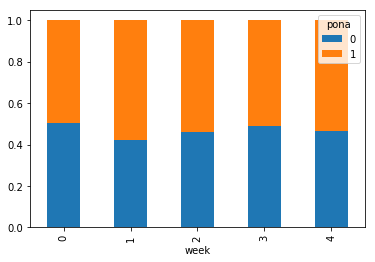

In [83]:
print(data.div(data.sum(axis=1), axis=0).plot(kind="bar", stacked=True))

In [84]:
# 透视表操作
print(stock.pivot_table(["pona"], index=["week"]))

          pona
week          
0     0.496000
1     0.580153
2     0.537879
3     0.507812
4     0.535433


### 分组与聚合

In [85]:
col = pd.DataFrame({'color': ['white','red','green','red','green'], 
                   'object': ['pen','pencil','pencil','ashtray','pen'],
                   'price1':[5.56,4.20,1.30,0.56,2.75],
                   'price2':[4.75,4.12,1.60,0.75,3.15]})


In [86]:
print(col)

   color   object  price1  price2
0  white      pen    5.56    4.75
1    red   pencil    4.20    4.12
2  green   pencil    1.30    1.60
3    red  ashtray    0.56    0.75
4  green      pen    2.75    3.15


In [87]:
# 进行分组，对颜色分组，price1进行聚合
# 用dataframe的方法进行分组
print(col.groupby(by="color")["price1"].max())

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64


In [88]:
print(col["price1"].groupby(col["color"]).max())

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64


### 4.10.3 星巴克零售店铺数据案例

In [89]:
# 1、准备数据
starbucks = pd.read_csv("directory.csv")

In [91]:
print(starbucks.head())

       Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1 

AxesSubplot(0.125,0.125;0.775x0.755)


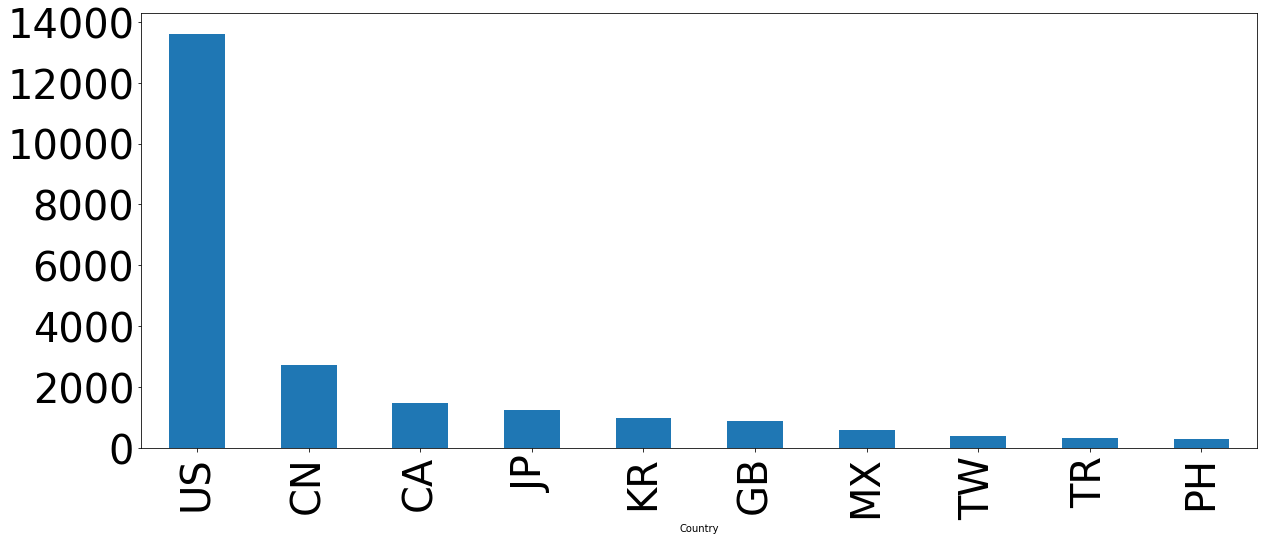

In [93]:
# 按照国家分组，求出每个国家的星巴克零售店数量
print(starbucks.groupby("Country").count()["Brand"].sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20, 8), fontsize=40))

In [94]:
# 假设我们加入省市一起进行分组
print(starbucks.groupby(by=["Country", "State/Province"]).count())

                        Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
        RK                  3             3           3               3   
        SH                  6             6           6               6   
        UQ                  1             1           1               1   
AR      B                  21            21          21              21   
        C                  73            73          73              73   
        M                   5             5           5               5   
        S                